In [3]:
import seaborn as sns
import pandas as pd
import csv
from matplotlib import pyplot as plt
import numpy as np
import math

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def poly_reg(X_F1,y_F1,):
    poly = PolynomialFeatures(degree=2)
    X_F1_poly = poly.fit_transform(X_F1)

    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                       random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)

    print('(poly deg 2) linear model coeff (w):\n{}'
         .format(linreg.coef_))
    print('(poly deg 2) linear model intercept (b): {:.3f}'
         .format(linreg.intercept_))
    print('(poly deg 2) R-squared score (training): {:.3f}'
         .format(linreg.score(X_train, y_train)))
    print('(poly deg 2) R-squared score (test): {:.3f}\n'
         .format(linreg.score(X_test, y_test)))
    
    return([linreg.coef_,linreg.intercept_])


In [63]:
def norm_plane1(df,gdp_type):
    a=df['luminosity']
    lum=[]
    for i in a:
        j=(i-min(a))/(max(a)-min(a))
        lum.append(j)
    
    b=df['population']
    pop=[]
    for i in b:
        j=(i-min(b))/(max(b)-min(b))
        pop.append(j)
        
    c=df[gdp_type]
    gdp=[]
    for i in c:
        j=(i-min(c))/(max(c)-min(c))
        gdp.append(j)
        
    tempdf= pd.DataFrame()
    tempdf['luminosity']=lum
    tempdf['poulation']=pop
    
    xx1, yy1 = np.meshgrid(lum, pop)
    a=poly_reg(tempdf,gdp)
    z1= (xx1*a[0][1]) + (yy1*a[0][2]) + xx1*xx1*a[0][3] + xx1*yy1*a[0][4] + yy1*yy1*a[0][5] + a[1]
    

    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.plot_surface(xx1, yy1, z1)
    ax.scatter(lum,pop ,gdp,color='red')
    ax.set_xlabel('luminosity')
    ax.set_ylabel('population')
    ax.set_zlabel(gdp_type)
    plt.title(gdp_type)

In [7]:
current=pd.read_csv('finaldatasets/currentgdp_data.csv')

In [8]:
current.sort_values(["luminosity"], axis=0, 
                 ascending=True, inplace=True) 

(poly deg 2) linear model coeff (w):
[ 0.          0.35892641  0.27713833 -0.43912977  3.08382394 -0.80156478]
(poly deg 2) linear model intercept (b): 0.021
(poly deg 2) R-squared score (training): 0.589
(poly deg 2) R-squared score (test): 0.543



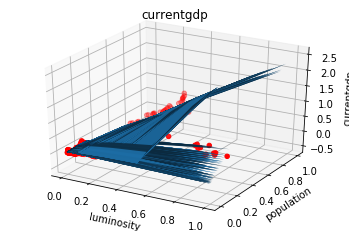

In [43]:
norm_plane1(current,'currentgdp')#nominal gdp

In [11]:
ppp=pd.read_csv('finaldatasets/newppp_data.csv')
ppp.sort_values(["luminosity"], axis=0, 
                 ascending=True, inplace=True) 

(poly deg 2) linear model coeff (w):
[ 0.          0.31010658 -0.01646429 -0.39406324  3.15014333 -0.35612035]
(poly deg 2) linear model intercept (b): 0.040
(poly deg 2) R-squared score (training): 0.606
(poly deg 2) R-squared score (test): 0.699



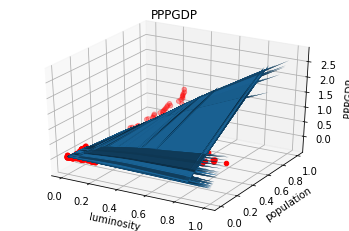

In [44]:
norm_plane1(ppp,'PPPGDP')

In [13]:
cons= pd.read_csv('finaldatasets/newcons_data.csv')
cons.sort_values(["luminosity"], axis=0, 
                 ascending=True, inplace=True) 

(poly deg 2) linear model coeff (w):
[ 0.          0.43179937  0.41065386 -0.30374825  3.02410397 -0.94051959]
(poly deg 2) linear model intercept (b): 0.025
(poly deg 2) R-squared score (training): 0.670
(poly deg 2) R-squared score (test): 0.625



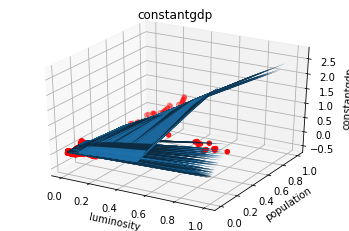

In [45]:
norm_plane1(cons,'constantgdp')#realgdp

In [15]:
gdpgw=pd.read_csv('finaldatasets/gdpgrowth.csv')

In [56]:
gdpgw.sort_values(["luminosity"], axis=0, 
                 ascending=True, inplace=True) 

In [17]:
gdpgw

,country,year,pixels,luminosity,lum/pix,lum_growth,population,gdpgrowth
189,Gambia,1992.0,32490.0,3.615000e+03,0.111265,-0.990030,1027475,3.378689
378,Lao PDR,1992.0,922745.0,8.498000e+03,0.009209,-0.981464,4500351,5.559858
243,Guinea,1992.0,556018.0,8.892000e+03,0.015992,-0.982649,6716038,3.270947
675,Uganda,1992.0,448020.0,1.384900e+04,0.030912,-0.980094,18561674,3.418357
27,Benin,1992.0,266448.0,1.497000e+04,0.056184,-0.894158,5331803,2.957711
...,...,...,...,...,...,...,...,...
512,Pakistan,2018.0,13140344.0,3.379533e+06,1.018669,0.016391,212215030,5.836417
161,Egypt,2018.0,6724142.0,3.414918e+06,2.030239,-0.002156,98423595,5.314121
566,Poland,2018.0,3341220.0,7.192932e+06,8.590136,-0.000834,37974750,5.349025
323,India,2018.0,46361728.0,2.065563e+07,1.808205,0.000663,1352617328,6.119587


(poly deg 2) linear model coeff (w):
[ 0.         -0.26435036  0.31204646  0.75205637 -0.60933373 -0.01876594]
(poly deg 2) linear model intercept (b): 0.790
(poly deg 2) R-squared score (training): 0.072
(poly deg 2) R-squared score (test): 0.022



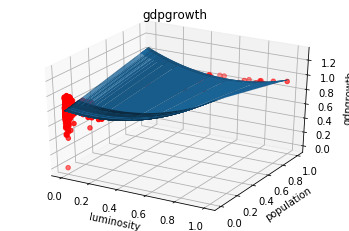

In [57]:
norm_plane1(gdpgw,'gdpgrowth')

In [19]:
percapita=pd.read_csv('finaldatasets/newGDPpercapitagrowth_data.csv')

In [58]:
percapita.sort_values(["luminosity"], axis=0, 
                 ascending=True, inplace=True) 

(poly deg 2) linear model coeff (w):
[ 0.         -0.05002949  0.01166731  0.2544527  -0.2471176   0.09386764]
(poly deg 2) linear model intercept (b): 0.370
(poly deg 2) R-squared score (training): 0.015
(poly deg 2) R-squared score (test): 0.007



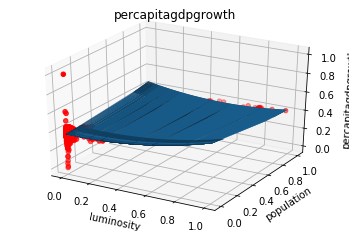

In [59]:
norm_plane1(percapita,'percapitagdpgrowth')

In [52]:
def norm_plane2(df,gdp_type):
    a=df['luminosity']
    lum=[]
    for i in a:
        j=(i-min(a))/(max(a)-min(a))
        lum.append(j)
    
    b=df['year']
    year=[]
    for i in b:
        j=(i-min(b))/(max(b)-min(b))
        year.append(j)
        
    c=df[gdp_type]
    gdp=[]
    for i in c:
        j=(i-min(c))/(max(c)-min(c))
        gdp.append(j)
        
    tempdf= pd.DataFrame()
    tempdf['luminosity']=lum
    tempdf['year']=year
    
    xx1, yy1 = np.meshgrid(lum, year)
    a=poly_reg(tempdf,gdp)
    z1= (xx1*a[0][1]) + (yy1*a[0][2]) + xx1*xx1*a[0][3] + xx1*yy1*a[0][4] + yy1*yy1*a[0][5] + a[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.plot_surface(xx1, yy1, z1)
    ax.scatter(lum,year,gdp,color='red')
    ax.set_xlabel('luminosity')
    ax.set_ylabel('population')
    plt.title(gdp_type)

(poly deg 2) linear model coeff (w):
[ 0.          0.10428325 -0.16289639  0.31675525  1.26915996  0.15114419]
(poly deg 2) linear model intercept (b): 0.057
(poly deg 2) R-squared score (training): 0.712
(poly deg 2) R-squared score (test): 0.672



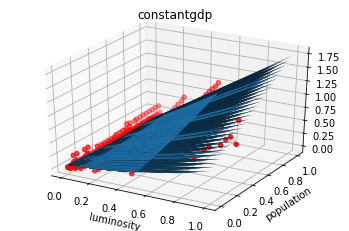

In [53]:
cons.sort_values(['year',"luminosity"], axis=0, 
                 ascending=True, inplace=True)
norm_plane2(cons,'constantgdp')#realgdp

(poly deg 2) linear model coeff (w):
[ 0.          0.21863968 -0.14140916 -0.14157109  1.43976578  0.17757208]
(poly deg 2) linear model intercept (b): 0.025
(poly deg 2) R-squared score (training): 0.656
(poly deg 2) R-squared score (test): 0.814



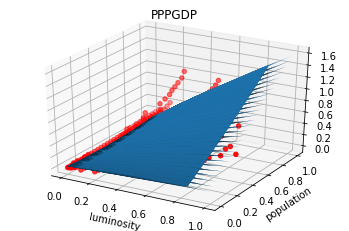

In [54]:
ppp.sort_values(['year',"luminosity"], axis=0, 
                 ascending=True, inplace=True)
norm_plane2(ppp,'PPPGDP')

(poly deg 2) linear model coeff (w):
[ 0.         -0.16087043 -0.15602206  0.27993007  1.5323921   0.14650466]
(poly deg 2) linear model intercept (b): 0.049
(poly deg 2) R-squared score (training): 0.708
(poly deg 2) R-squared score (test): 0.681



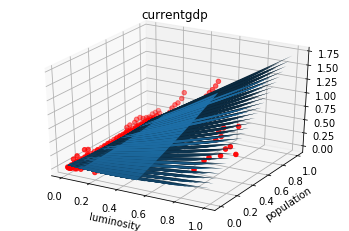

In [55]:
current.sort_values(['year',"luminosity"], axis=0, 
                 ascending=True, inplace=True)
norm_plane2(current,'currentgdp')#nominalgdp

(poly deg 2) linear model coeff (w):
[ 0.          0.12878911  0.11165814  0.15187982 -0.25518091 -0.05509693]
(poly deg 2) linear model intercept (b): 0.763
(poly deg 2) R-squared score (training): 0.103
(poly deg 2) R-squared score (test): 0.099



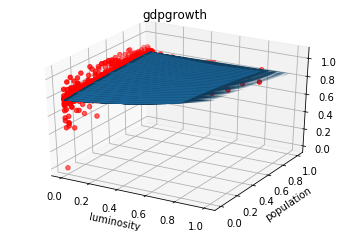

In [61]:
gdpgw.sort_values(['year',"luminosity"], axis=0, 
                 ascending=True, inplace=True) 
norm_plane2(gdpgw,'gdpgrowth')

(poly deg 2) linear model coeff (w):
[ 0.          0.01832385  0.13314583  0.05761522 -0.04941404 -0.11113706]
(poly deg 2) linear model intercept (b): 0.341
(poly deg 2) R-squared score (training): 0.052
(poly deg 2) R-squared score (test): 0.105



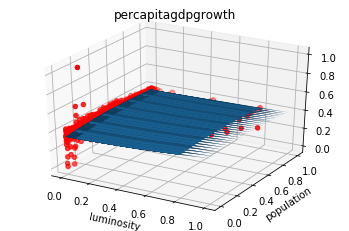

In [62]:
percapita.sort_values(['year',"luminosity"], axis=0, 
                 ascending=True, inplace=True) 
norm_plane2(percapita,'percapitagdpgrowth')